In [41]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline


In [42]:
# spotify = pd.read_csv('train.csv')
spotify = pd.read_csv('train.tsv', sep='\t')

In [43]:
spotify.describe()

,id,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,16582.000000,16582.000000,16582.000000,16582.000000,16582.000000,16582.000000,16582.000000,16582.000000,16582.000000,16582.000000,16582.000000,16582.000000,16582.000000
mean,8290.500000,10379.231034,0.537497,0.581647,5.221204,-9.831052,0.630141,0.080860,0.355857,0.192579,0.177035,0.461826,118.044775
std,4786.955417,6019.280318,0.199509,0.294844,3.570215,7.028912,0.482781,0.088269,0.369993,0.330111,0.142501,0.274358,30.286873
min,0.000000,0.000000,0.057800,0.000243,0.000000,-47.327000,0.000000,0.022400,0.000000,0.000000,0.010900,0.011800,30.875000
25%,4145.250000,5163.250000,0.399000,0.358000,2.000000,-11.935500,0.000000,0.037300,0.019000,0.000000,0.092100,0.225000,94.995500
50%,8290.500000,10388.500000,0.553000,0.648000,5.000000,-7.251000,1.000000,0.048700,0.193000,0.000418,0.120000,0.459000,115.619500
75%,12435.750000,15593.750000,0.691000,0.830000,8.000000,-5.096250,1.000000,0.082400,0.726000,0.230750,0.217000,0.690000,136.310250
max,16581.000000,20789.000000,0.978000,1.000000,11.000000,0.719000,1.000000,0.960000,0.996000,0.986000,0.996000,0.989000,219.938000


In [44]:
spotify.head()
id = spotify['id']
del spotify['id']
del spotify['title']
del spotify['index']
y= spotify['genre']
del spotify['genre']

In [45]:
spotify.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64

In [6]:
spotify.shape

(16582, 12)

In [7]:
spotify['genre'].unique()

array(['hiphop', 'metal', 'classical', 'indie_alt', 'punk', 'romance',
       'blues', 'latin', 'pop', 'rock', 'reggae', 'funk', 'party', 'jazz',
       'country'], dtype=object)

In [8]:
spotify['genre'].unique()

array(['hiphop', 'metal', 'classical', 'indie_alt', 'punk', 'romance',
       'blues', 'latin', 'pop', 'rock', 'reggae', 'funk', 'party', 'jazz',
       'country'], dtype=object)

## DATA CLEANING

In [46]:
spotify['Genres']=le.fit_transform(y)


y = spotify['Genres']
del spotify['Genres']


In [47]:
y


0         4
1         8
2         4
3         8
4         1
5         5
6        11
7         5
8        14
9         0
10        7
11       10
12       13
13        7
14       12
15        1
16        1
17        7
18       10
19       10
20       13
21        1
22       10
23       13
24        3
25        1
26       14
27        9
28       14
29        5
         ..
16552     5
16553     5
16554    11
16555    14
16556    10
16557    11
16558     7
16559    14
16560     8
16561     4
16562    14
16563     7
16564     4
16565    13
16566    13
16567     5
16568    10
16569     5
16570     8
16571     7
16572    12
16573     1
16574    13
16575     7
16576     4
16577    12
16578     1
16579    13
16580    10
16581     9
Name: Genres, Length: 16582, dtype: int64

In [10]:
def plot_correlation_map( data_frame ):
    corr = data_frame.corr()
    _ , ax = plt.subplots( figsize =( 20 , 18 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )



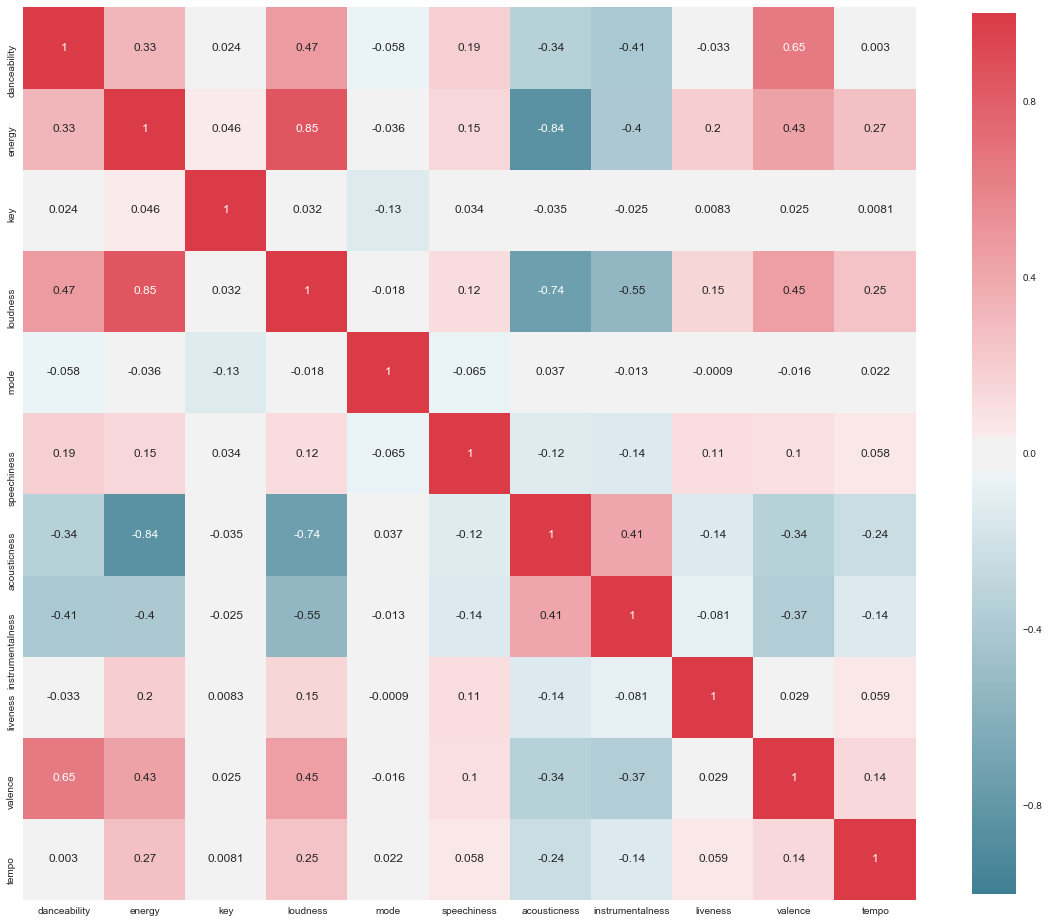

In [11]:
plot_correlation_map(spotify)
spotify.corr()
plt.show()

In [51]:
spotify.head()
spotify.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [49]:

scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(spotify)


In [54]:
scaled = pd.DataFrame(scaled_df,columns=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')
scaled.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.460987,0.476873,0.909091,0.809287,0,0.0297568,0.0201807,0,0.243732,0.384977,0.460032
1,0.500109,0.857965,0,0.857095,1,0.0477816,0.00565261,0.00353955,0.0496396,0.235571,0.46028
2,0.527277,0.818956,1,0.877825,0,0.0541809,0.0185743,0,0.199066,0.361441,0.283852
3,0.253423,0.757941,0.0909091,0.733131,1,0.0354096,0.000921687,6.93712e-06,0.284337,0.446377,0.263013
4,0.0431428,0.0693739,0.272727,0.465928,1,0.0196246,0.995984,0.467546,0.0914628,0.0240483,0.264446


['blues',
 'classical',
 'country',
 'funk',
 'hiphop',
 'indie_alt',
 'jazz',
 'latin',
 'metal',
 'party',
 'pop',
 'punk',
 'reggae',
 'rock',
 'romance']

array([ 4,  8,  1,  5, 11, 14,  0,  7, 10, 13, 12,  3,  9,  6,  2])

array([ 4,  8,  1,  5, 11, 14,  0,  7, 10, 13, 12,  3,  9,  6,  2])

## feature selection

### removal of features with low variance

In [60]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn import cross_validation as cv
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [62]:
x_train,x_test,y_train,y_test=cv.train_test_split(scaled,y,test_size=0.20)

KeyError: 'index'

In [70]:

clfrandom=rfc(n_estimators = 10)
clfrandom.fit(x_train,y_train)
score=clfrandom.score(x_test,y_test)
score
# spotify.head()

0.51190835091950559

0.708772987639


0.68586071751582756

In [64]:
clfdtc=dtc()
clfdtc.fit(x_train,y_train)
score=clfdtc.score(x_test,y_test)
score

0.45221585770274342

In [65]:
 test = pd.read_csv('test.tsv',sep ='\t')

In [66]:
test.head()

,id,index,title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,16687,Solita,0.778,0.683,11,-5.731,1,0.0348,0.395000,0.000000,0.0920,0.757,129.942
1,1,6875,Agnosie,0.377,0.966,7,-4.426,1,0.1210,0.000204,0.190000,0.1510,0.115,131.734
2,2,20085,Poore Chand,0.458,0.735,8,-4.580,1,0.0412,0.018700,0.000002,0.0751,0.138,151.894
3,3,8281,Follow The Leader,0.580,0.094,6,-25.832,1,0.9230,0.922000,0.000000,0.4270,0.442,59.580
4,4,20731,Born Under A Bad Sign,0.698,0.662,11,-5.970,1,0.0272,0.513000,0.000229,0.0362,0.900,91.390


In [67]:
del test['title']
del test['index']
del test['id']

In [69]:
test.head()


array([[ 0.78220625,  0.6841529 ,  1.        , ...,  0.07689123,
         0.77131415,  0.49693597],
       [ 0.34552978,  0.96791395,  0.63636364, ...,  0.13794888,
         0.09474128,  0.50768105],
       [ 0.43373625,  0.73629274,  0.72727273, ...,  0.05940184,
         0.11897987,  0.62856321],
       ..., 
       [ 0.372754  ,  0.92179024,  0.18181818, ...,  0.06519714,
         0.27178839,  0.55600393],
       [ 0.13426985,  0.03310679,  0.18181818, ...,  0.10069337,
         0.18115713,  0.49546692],
       [ 0.27910269,  0.02789281,  0.54545455, ...,  0.07068198,
         0.01148698,  0.14588605]])

array([14, 14, 14, ..., 14, 14, 14])

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Genres
0,0.4820,0.4770,10,-8.444,0,0.0503,0.020100,0.000000,0.2510,0.3880,117.850,4
1,0.5180,0.8580,0,-6.147,1,0.0672,0.005630,0.003490,0.0598,0.2420,117.897,8
2,0.5430,0.8190,11,-5.151,0,0.0732,0.018500,0.000000,0.2070,0.3650,84.541,4
3,0.2910,0.7580,1,-12.103,1,0.0556,0.000918,0.000007,0.2910,0.4480,80.601,8
4,0.0975,0.0696,3,-24.941,1,0.0408,0.992000,0.461000,0.1010,0.0353,80.872,1


0.97408077154912598

In [71]:
print(clfrandom.feature_importances_)

[ 0.11497581  0.115714    0.0466481   0.13624889  0.01490949  0.10090906
  0.1380838   0.08432677  0.06938326  0.09735285  0.08144798]


KeyError: 'id'

,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Genres
0,0.4820,0.4770,10,0,0.0503,0.020100,0.000000,0.2510,0.3880,117.850,4
1,0.5180,0.8580,0,1,0.0672,0.005630,0.003490,0.0598,0.2420,117.897,8
2,0.5430,0.8190,11,0,0.0732,0.018500,0.000000,0.2070,0.3650,84.541,4
3,0.2910,0.7580,1,1,0.0556,0.000918,0.000007,0.2910,0.4480,80.601,8
4,0.0975,0.0696,3,1,0.0408,0.992000,0.461000,0.1010,0.0353,80.872,1


In [72]:
spotify.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.4820,0.4770,10,-8.444,0,0.0503,0.020100,0.000000,0.2510,0.3880,117.850
1,0.5180,0.8580,0,-6.147,1,0.0672,0.005630,0.003490,0.0598,0.2420,117.897
2,0.5430,0.8190,11,-5.151,0,0.0732,0.018500,0.000000,0.2070,0.3650,84.541
3,0.2910,0.7580,1,-12.103,1,0.0556,0.000918,0.000007,0.2910,0.4480,80.601
4,0.0975,0.0696,3,-24.941,1,0.0408,0.992000,0.461000,0.1010,0.0353,80.872


Index(['danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'Genres'],
      dtype='object')

KeyError: "['loudness'] not in index"

In [73]:
answer = clfrandom.predict(test)


In [74]:
answer

array([ 1,  8,  1, ..., 13,  1,  1])

In [75]:
answer.size

4146

In [76]:
final= pd.DataFrame(answer, columns =['genre'])
final.head()

,genre
0,1
1,8
2,1
3,8
4,1


In [77]:

finalright = le.inverse_transform(final['genre'])

In [79]:

finaloutput = pd.DataFrame(finalright,columns=['genre'])
finaloutput.head()

,genre
0,classical
1,metal
2,classical
3,metal
4,classical


In [80]:
finaloutput.to_csv('out4.csv',sep=',')